In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')

jobs = pd.read_csv('../data/salaries.csv')

In [79]:
key_words = ('Data','Machine Learning', 'Analyst', 'Analysis', 'Analytics','Bussiness Intelligence', 'AI', 'BI', 'Decision Scientist','Computer Vision', 'NLP', 'ML', 'Artificial Intelligence','Deep Learning', 'ETL')

jobs = jobs[jobs['job_title'].str.contains('|'.join(key_words))]


jobs = jobs[jobs['work_year'] != 2025]

jobs

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
4544,2024,MI,FT,Business Analyst,25860,USD,25860,IN,100,UA,M
14516,2024,EN,FT,Data Quality Specialist,16100,EUR,17888,PT,100,US,L
15836,2024,SE,FT,Data Developer,131958,USD,131958,US,0,US,M
15837,2024,SE,FT,Data Developer,79175,USD,79175,US,0,US,M
15840,2024,EN,FT,Analytics Engineer,720000,USD,720000,US,0,US,M
...,...,...,...,...,...,...,...,...,...,...,...
88579,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
88580,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
88581,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
88582,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [80]:
df_remote = pd.DataFrame(jobs.groupby(['work_year','remote_ratio'])['job_title'].count())


def get_percents(year):

    full = df_remote.loc[year].loc[0]
    hybrid = df_remote.loc[year].loc[50]
    remote = df_remote.loc[year].loc[100]
    suma = df_remote.loc[year].sum()

    return (full/suma)*100, (hybrid/suma)*100, (remote/suma)*100

print(get_percents(2020))

# for i in remote:
#     print (i)



# plt.figure(figsize=(7,7))
# plt.plot(remote.loc[0], label="Full", color='#87CEFA')
# plt.plot(remote.loc[50], label="Hybrid", color='#6495ED')
# plt.plot(remote.loc[100], label="Remote", color='#7B68EE')
# # plt.axhline(100000, color='red', label='IT') ## INFORMACION COMPARATIVA DE MEDIANA DE IT

# plt.legend()

# plt.xticks([2020,2021,2022,2023,2024])

(job_title    23.287671
dtype: float64, job_title    27.39726
dtype: float64, job_title    49.315068
dtype: float64)


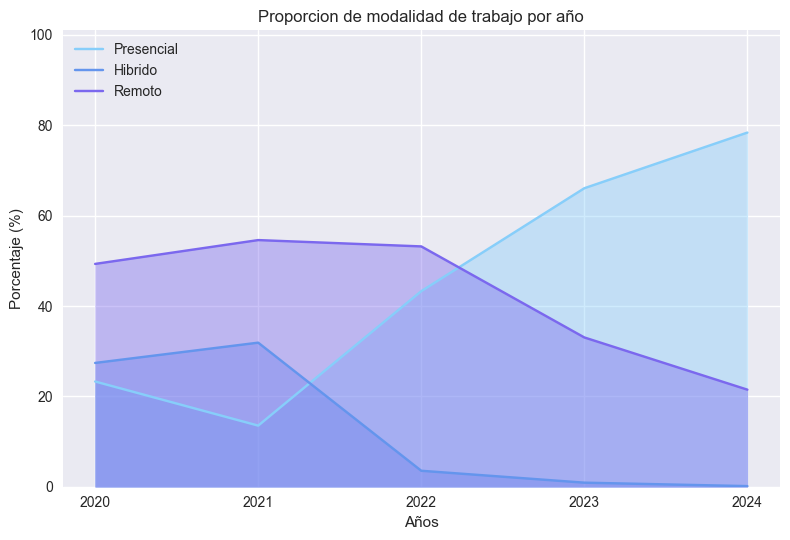

In [89]:
remote_ratios = pd.DataFrame(jobs.groupby(['work_year'])['remote_ratio'].value_counts(normalize=True) *100)

remote_ratios = remote_ratios.reset_index()

pivoted_ratios = remote_ratios.pivot(index='work_year', columns='remote_ratio', values='proportion')
pivoted_ratios


plt.plot(pivoted_ratios.index, pivoted_ratios[0], label='Presencial', color='#87CEFA')
plt.fill_between(pivoted_ratios.index, pivoted_ratios[0], color='#87CEFA', alpha=0.4)
plt.plot(pivoted_ratios.index, pivoted_ratios[50], label='Hibrido', color='#6495ED')
plt.fill_between(pivoted_ratios.index, pivoted_ratios[50], color='#6495ED', alpha=0.4)
plt.plot(pivoted_ratios.index, pivoted_ratios[100], label='Remoto', color='#7B68EE')
plt.fill_between(pivoted_ratios.index, pivoted_ratios[100], color='#7B68EE', alpha=0.4)


plt.xticks(pivoted_ratios.index)
plt.ylim(0,101)
plt.title('Proporcion de modalidad de trabajo por año')
plt.xlabel('Años')
plt.ylabel('Porcentaje (%)')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# plt.stackplot(data=remote_ratios,y='proportion', x='work_year')

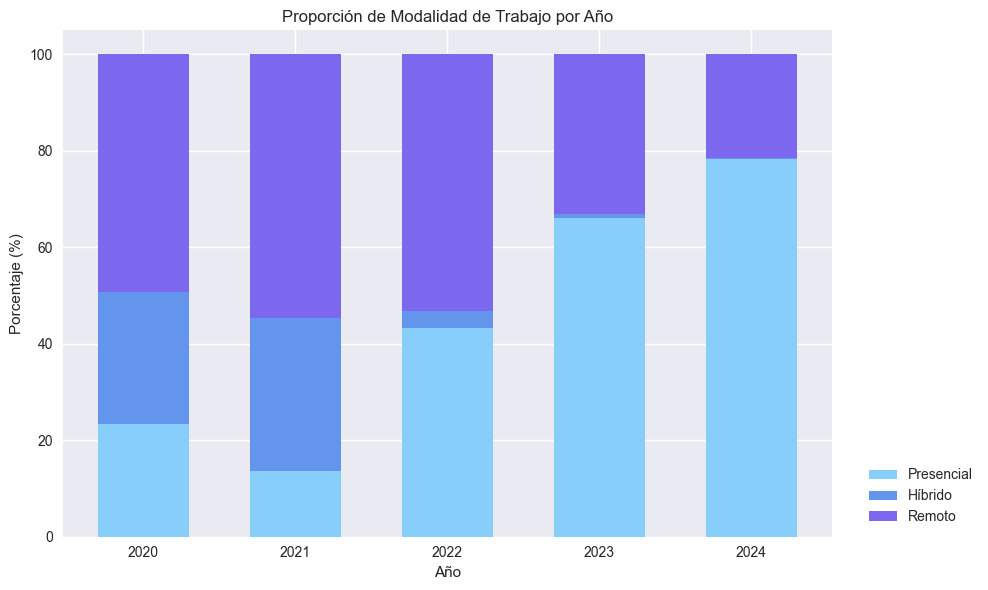

In [100]:
remote_ratios = pd.DataFrame(jobs.groupby(['work_year'])['remote_ratio'].value_counts(normalize=True) *100)

remote_ratios = remote_ratios.reset_index()
remote_ratios

pivoted_ratios = remote_ratios.pivot(index='work_year', columns='remote_ratio', values='proportion')
pivoted_ratios



fig, ax = plt.subplots(figsize=(10, 6))

bar_positions = pivoted_ratios.index
bar_width = 0.6


ax.bar(bar_positions, pivoted_ratios[0], label='Presencial', color='#87CEFA', width=bar_width)
ax.bar(bar_positions, pivoted_ratios[50], bottom=pivoted_ratios[0], label='Híbrido', color='#6495ED', width=bar_width)
ax.bar(bar_positions, pivoted_ratios[100], bottom=pivoted_ratios[0] + pivoted_ratios[50], label='Remoto', color='#7B68EE', width=bar_width)


ax.set_title('Proporción de Modalidad de Trabajo por Año')
ax.set_xlabel('Año')
ax.set_ylabel('Porcentaje (%)')
ax.set_xticks(bar_positions)
ax.set_xticklabels(pivoted_ratios.index)
ax.legend(loc='lower right', bbox_to_anchor=(1.2,0))

plt.tight_layout()
plt.show()